In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise =0.3, random_state=1)

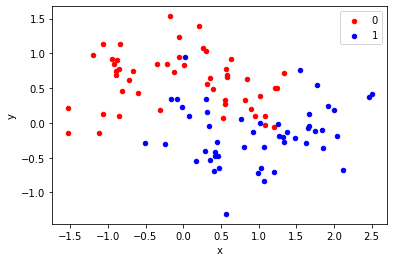

In [ ]:
df = pd.DataFrame(dict(x=X[:,0],y=X[:,1],label=y))
colors ={0:'red',1:'blue'}
fig,ax = plt.subplots()
grouped = df.groupby('label')
for key,group in grouped:
  group.plot(ax=ax,kind ='scatter',x='x',y='y', label=key, color = colors[key])
plt.show()

In [ ]:
n_train = 70
trainX,testX =X[:n_train,:],X[n_train:,:]
trainy,testy=y[:n_train],y[n_train:]

In [ ]:
df_trainX = pd.DataFrame(trainX,columns=['x','y'])
df_testX = pd.DataFrame(testX,columns=['x','y'])
df_trainy = pd.DataFrame(trainy,columns=['label'])
df_testy = pd.DataFrame(testy,columns=['label'])

In [ ]:
frames_train = [df_trainy, df_trainX]
frames_test = [df_testy, df_testX]
df_train = pd.concat(frames_train, axis=1)
df_test = pd.concat(frames_test, axis=1)

In [ ]:
df_test.head(3)

,label,x,y
0,1,-0.015649,0.223712
1,0,0.215265,1.386756
2,1,0.348903,-0.531717


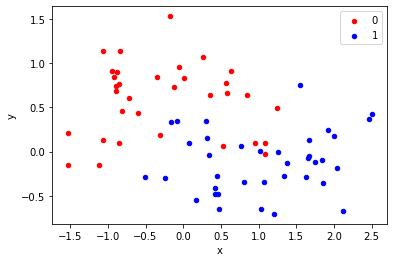

In [ ]:
colors ={0:'red',1:'blue'}
fig,ax = plt.subplots()
grouped = df_train.groupby('label')
for key,group in grouped:
  group.plot(ax=ax,kind ='scatter',x='x',y='y', label=key, color = colors[key])
plt.show()

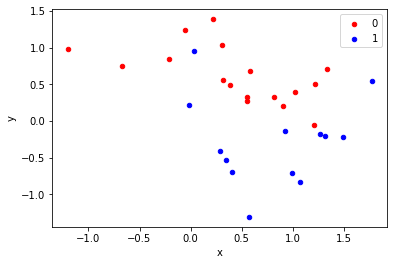

In [ ]:
colors ={0:'red',1:'blue'}
fig,ax = plt.subplots()
grouped = df_test.groupby('label')
for key,group in grouped:
  group.plot(ax=ax,kind ='scatter',x='x',y='y', label=key, color = colors[key])
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(500,input_dim=2,activation='relu'))
#model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               1500      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 501       
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


Train: 0.971, Test : 0.833


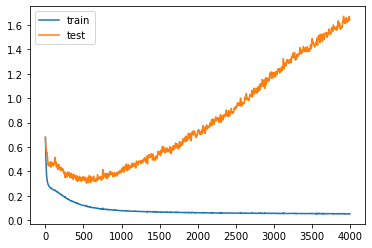

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(trainX,trainy,validation_data =(testX,testy),epochs=4000,verbose=0)
_,train_acc=model.evaluate(trainX,trainy,verbose=0)
_,test_acc=model.evaluate(testX,testy,verbose=0)
print('Train: %.3f, Test : %.3f' %(train_acc,test_acc))
plt.plot(history.history['loss'],label ='train')
plt.plot(history.history['val_loss'],label ='test')
plt.legend()
plt.show()

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import models

In [ ]:
es = EarlyStopping(monitor='val_loss', mode = 'min',verbose=1,patience = 200)

In [ ]:
model = Sequential()
model.add(Dense(500,input_dim=2,activation='relu'))
#model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 00723: early stopping
Train: 0.943, Test : 0.933


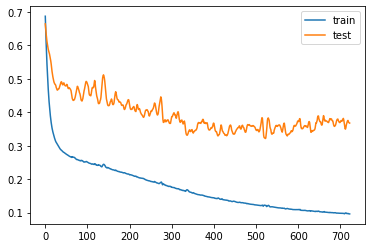

In [ ]:
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_1 = model.fit(trainX,trainy,validation_data =(testX,testy),epochs=4000,verbose=0,callbacks=[es])
_,train_acc=model.evaluate(trainX,trainy,verbose=0)
_,test_acc=model.evaluate(testX,testy,verbose=0)
print('Train: %.3f, Test : %.3f' %(train_acc,test_acc))
plt.plot(history_1.history['loss'],label ='train')
plt.plot(history_1.history['val_loss'],label ='test')
plt.legend()
plt.show()

In [ ]:
es = EarlyStopping(monitor='val_loss', mode = 'min',verbose=1,patience = 200)
#mc = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5',monitor='val_accuracy', mode = 'max',verbose=1,save_best_only=True)
mc = ModelCheckpoint('best_model.hdf5',monitor='val_accuracy', mode = 'max',verbose=0,save_best_only=True)

In [ ]:
model = Sequential()
model.add(Dense(500,input_dim=2,activation='relu'))
#model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 00599: early stopping
Train: 0.886, Test : 0.933


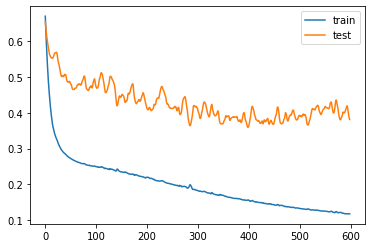

In [ ]:
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_2 = model.fit(trainX,trainy,validation_data =(testX,testy),epochs=4000,verbose=0,callbacks=[es,mc])
saved_model = models.load_model('best_model.hdf5')
_,train_acc=saved_model.evaluate(trainX,trainy,verbose=0)
_,test_acc=saved_model.evaluate(testX,testy,verbose=0)
print('Train: %.3f, Test : %.3f' %(train_acc,test_acc))
plt.plot(history_2.history['loss'],label ='train')
plt.plot(history_2.history['val_loss'],label ='test')
plt.legend()
plt.show()

In [ ]:
es = EarlyStopping(monitor='val_loss', mode = 'min',verbose=1,patience = 200)
#mc = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5',monitor='val_accuracy', mode = 'max',verbose=1,save_best_only=True)
mc = ModelCheckpoint('best_model1.hdf5',monitor='val_accuracy', mode = 'max',verbose=0,save_best_only=True)

In [ ]:
model = Sequential()
model.add(Dense(500,input_dim=2,activation='relu',kernel_regularizer='l1'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 00907: early stopping
Train: 0.857, Test : 0.867


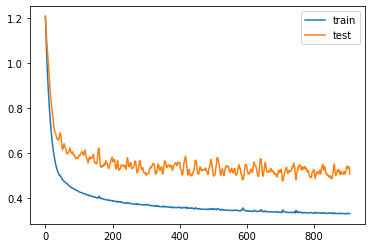

In [ ]:
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_3 = model.fit(trainX,trainy,validation_data =(testX,testy),epochs=4000,verbose=0,callbacks=[es,mc])
saved_model1 = models.load_model('best_model1.hdf5')
_,train_acc=saved_model1.evaluate(trainX,trainy,verbose=0)
_,test_acc=saved_model1.evaluate(testX,testy,verbose=0)
print('Train: %.3f, Test : %.3f' %(train_acc,test_acc))
plt.plot(history_3.history['loss'],label ='train')
plt.plot(history_3.history['val_loss'],label ='test')
plt.legend()
plt.show()

In [ ]:
es = EarlyStopping(monitor='val_loss', mode = 'min',verbose=1,patience = 200)
#mc = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5',monitor='val_accuracy', mode = 'max',verbose=1,save_best_only=True)
mc = ModelCheckpoint('best_model2.hdf5',monitor='val_accuracy', mode = 'max',verbose=0,save_best_only=True)

In [ ]:
model = Sequential()
model.add(Dense(500,input_dim=2,activation='relu',activity_regularizer='l1'))
#model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 01555: early stopping
Train: 0.957, Test : 0.933


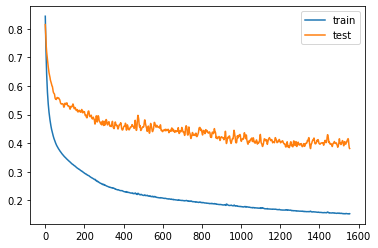

In [ ]:
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_4 = model.fit(trainX,trainy,validation_data =(testX,testy),epochs=4000,verbose=0,callbacks=[es,mc])
saved_model2 = models.load_model('best_model2.hdf5')
_,train_acc=saved_model2.evaluate(trainX,trainy,verbose=0)
_,test_acc=saved_model2.evaluate(testX,testy,verbose=0)
print('Train: %.3f, Test : %.3f' %(train_acc,test_acc))
plt.plot(history_4.history['loss'],label ='train')
plt.plot(history_4.history['val_loss'],label ='test')
plt.legend()
plt.show()

In [ ]:
es = EarlyStopping(monitor='val_loss', mode = 'min',verbose=1,patience = 200)
#mc = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5',monitor='val_accuracy', mode = 'max',verbose=1,save_best_only=True)
mc = ModelCheckpoint('best_model2.hdf5',monitor='val_accuracy', mode = 'max',verbose=0,save_best_only=True)

In [ ]:
model = Sequential()
model.add(Dense(500,input_dim=2,activation='relu',activity_regularizer='l2'))
#model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 00860: early stopping
Train: 0.886, Test : 0.933


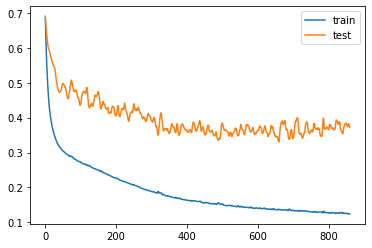

In [ ]:
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_4 = model.fit(trainX,trainy,validation_data =(testX,testy),epochs=4000,verbose=0,callbacks=[es,mc])
saved_model2 = models.load_model('best_model2.hdf5')
_,train_acc=saved_model2.evaluate(trainX,trainy,verbose=0)
_,test_acc=saved_model2.evaluate(testX,testy,verbose=0)
print('Train: %.3f, Test : %.3f' %(train_acc,test_acc))
plt.plot(history_4.history['loss'],label ='train')
plt.plot(history_4.history['val_loss'],label ='test')
plt.legend()
plt.show()

In [ ]:
es = EarlyStopping(monitor='val_loss', mode = 'min',verbose=1,patience = 200)
#mc = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5',monitor='val_accuracy', mode = 'max',verbose=1,save_best_only=True)
mc = ModelCheckpoint('best_model3.hdf5',monitor='val_accuracy', mode = 'max',verbose=0,save_best_only=True)

In [ ]:
model = Sequential()
model.add(Dense(500,input_dim=2,activation='relu',bias_regularizer='l1'))
#model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 00606: early stopping
Train: 0.857, Test : 0.867


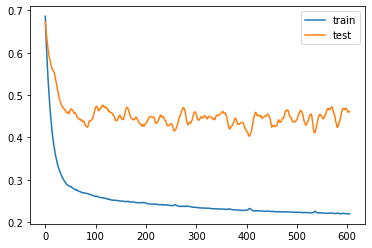

In [ ]:
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_5 = model.fit(trainX,trainy,validation_data =(testX,testy),epochs=4000,verbose=0,callbacks=[es,mc])
saved_model3 = models.load_model('best_model3.hdf5')
_,train_acc=saved_model3.evaluate(trainX,trainy,verbose=0)
_,test_acc=saved_model3.evaluate(testX,testy,verbose=0)
print('Train: %.3f, Test : %.3f' %(train_acc,test_acc))
plt.plot(history_5.history['loss'],label ='train')
plt.plot(history_5.history['val_loss'],label ='test')
plt.legend()
plt.show()